In [ ]:
Controlled-U operation

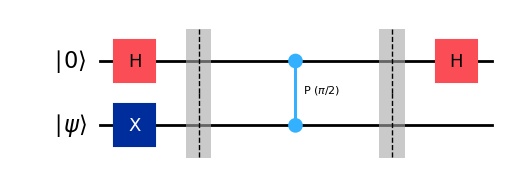

In [5]:
# If needed in your notebook:
# %pip install qiskit qiskit-aer

from math import pi
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import PhaseGate

# --- parameters (tweak φ to taste) ---
phi = 1/4  # the phase U = Rz(2πφ) applies to the target (eigenstate)
# -------------------------------------

# Name the wires so the left labels match your diagram
ctrl = QuantumRegister(1, "∣0⟩")   # control wire label
targ = QuantumRegister(1, "∣ψ⟩")   # target/eigenstate wire label
qc = QuantumCircuit(ctrl, targ, name="Phase kickback")

# Prepare: (optionally set the target to |1> if your |ψ> is |1>)
#qc.x(targ[0])  # uncomment if you want |ψ>=|1⟩ explicitly

# H on control (left blue H in your SVG)
qc.h(ctrl[0])
qc.barrier()

# Controlled-U on target (U = Rz(2πφ)), shows as a control dot linked to a box 'U'
U = PhaseGate(2*pi*phi, label="U")   # single-qubit U with a 'U' label
cU = U.control(1)                    # make it controlled by the control qubit
qc.append(cU, [ctrl[0], targ[0]])
qc.barrier()

# H on control (right blue H in your SVG)
qc.h(ctrl[0])

# Draw inline (no saving to file)
qc.draw("mpl")



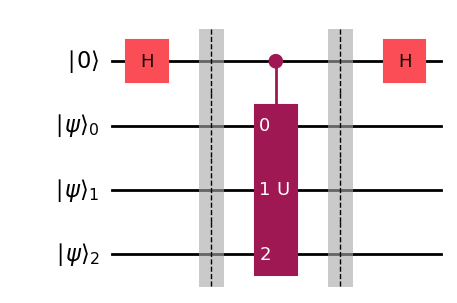

In [1]:
# %pip install qiskit  # if needed

from qiskit import QuantumCircuit, QuantumRegister

# --- layout: 1 control wire + N target wires that the blue "U" spans ---
N = 3  # number of target qubits shown running horizontally through the U box

ctrl = QuantumRegister(1, "∣0⟩")      # control line (top)
targ = QuantumRegister(N, "∣ψ⟩")      # target system with many lines
qc = QuantumCircuit(ctrl, targ, name="Controlled multi-qubit U")

# Left H on the control (like your diagram)
qc.h(ctrl[0])
qc.barrier()

# --- Build a multi-qubit unitary as a single boxed gate labeled "U" ---
# Use a subcircuit so the drawer shows a single blue box across all target wires.
U_body = QuantumCircuit(N, name="U")
# (the contents don't matter for the picture; keep them collapsed in a single box)
# If you want a real action, you *can* add gates here, but they stay hidden/collapsed in the box.

U_gate = U_body.to_gate(label="U")    # make it a gate with the label "U"
cU = U_gate.control(1)                 # controlled-U (one control dot)

# Place the controlled-U between control and all N targets
qc.append(cU, [ctrl[0], *targ])

qc.barrier()

# Right H on the control (like your diagram)
qc.h(ctrl[0])

# Draw inline (no saving to file)
qc.draw("mpl")
